In [27]:
#import modules
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sn
import numpy as np
% matplotlib inline

In [2]:
df=pd.read_excel('Churn-Modelling.xlsx')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [42]:
df.duplicated().sum()

0

In [41]:
df.groupby(['Gender', 'Exited']).count()

RowNumber  CustomerId  Surname  CreditScore  Geography   Age  \
Gender Exited                                                                 
Female 0            3404        3404     3404         3404       3404  3404   
       1            1139        1139     1139         1139       1139  1139   
Male   0            4559        4559     4559         4559       4559  4559   
       1             898         898      898          898        898   898   

               Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
Gender Exited                                                              
Female 0         3404     3404           3404       3404            3404   
       1         1139     1139           1139       1139            1139   
Male   0         4559     4559           4559       4559            4559   
       1          898      898            898        898             898   

               EstimatedSalary  
Gender Exited                   
Female 0                  3404  
       1                  1139  
Male   0                  4559  
       1                   898

In [7]:
f0=df.query('Gender=="Female" and Exited==0').Exited.count()
f0

3404

In [8]:
f1=df.query('Gender=="Female" and Exited==1').Exited.count()
f1

1139

In [9]:
m0=df.query('Gender=="Male" and Exited==0').Exited.count()
m0

4559

In [10]:
m1=df.query('Gender=="Male" and Exited==1').Exited.count()
m1

898

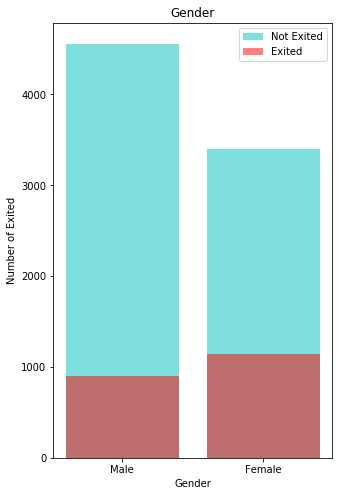

In [46]:
plt.subplots(figsize=(5,8))
plt.bar(['Male','Female'],[m0,f0], alpha=0.5, label ='Not Exited', color = 'c')
plt.bar(['Male','Female'],[m1,f1], alpha=0.5, label ='Exited', color = 'red')
plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Exited')
plt.legend()
plt.show()

`The above figure shows that 1139 of females are likely to exit and 898 of male exits `

In [12]:
gdf=df['Geography'].value_counts()
gdf

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

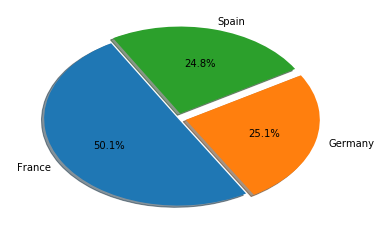

In [47]:
geo_labels = [gdf.index[0], gdf.index[1], gdf.index[2]]
sizes = [gdf[0], gdf[1], gdf[2]]
plt.pie(sizes,labels=geo_labels,explode = (0, 0.06, .06), autopct='%1.1f%%',shadow=True, startangle=120);

`we can observe that France has half of customers of the bank and rest Spain and Germany have the other half combined`

In [14]:
NA0=df.query('IsActiveMember==0 and Exited==0').Exited.count()
NA0

3547

In [15]:
NA1=df.query('IsActiveMember==0 and Exited==1').Exited.count()
NA1

1302

In [16]:
A0=df.query('IsActiveMember==1 and Exited==0').Exited.count()
A0

4416

In [17]:
A1=df.query('IsActiveMember==1 and Exited==1').Exited.count()
A1

735

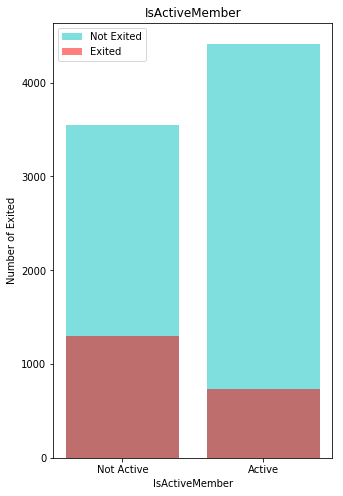

In [48]:
plt.subplots(figsize=(5,8))
plt.bar(['Not Active','Active'],[NA0,A0], alpha=0.5, label ='Not Exited', color = 'c')
plt.bar(['Not Active','Active'],[NA1,A1], alpha=0.5, label ='Exited', color = 'red')
plt.title('IsActiveMember')
plt.xlabel('IsActiveMember')
plt.ylabel('Number of Exited')
plt.legend()
plt.show()

`The above figure shows that the customer is an active member not most likely to exit than the ones which are not active`

In [19]:
df['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [58]:
p1_0=df.query('NumOfProducts==1 and Exited==0').Exited.count()
p1_1=df.query('NumOfProducts==1 and Exited==1').Exited.count()
p2_0=df.query('NumOfProducts==2 and Exited==0').Exited.count()
p2_1=df.query('NumOfProducts==2 and Exited==1').Exited.count()
p3_0=df.query('NumOfProducts==3 and Exited==0').Exited.count()
p3_1=df.query('NumOfProducts==3 and Exited==1').Exited.count()
p4_0=df.query('NumOfProducts==4 and Exited==0').Exited.count()
p4_1=df.query('NumOfProducts==4 and Exited==1').Exited.count()
print("not exited",p1_0,p2_0,p3_0,p4_0)
print("exited    ",p1_1,p2_1,p3_1,p4_1)

not exited 3675 4242 46 0
exited     1409 348 220 60


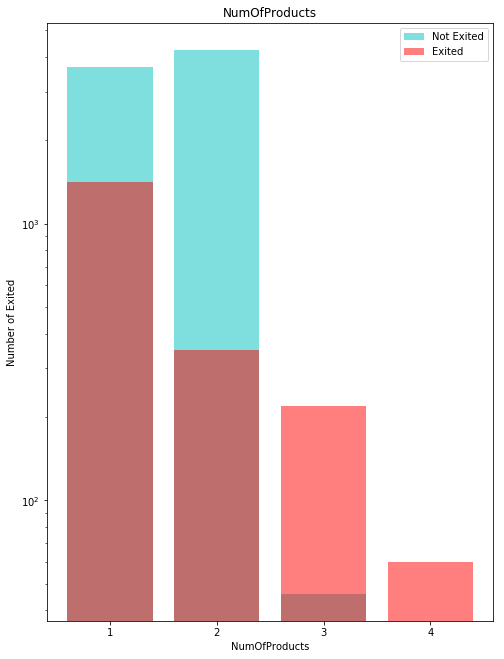

In [66]:
plt.subplots(figsize=(8,11))
plt.bar(['1','2','3','4'],[p1_0,p2_0,p3_0,p4_0], alpha=0.5, label ='Not Exited', color = 'c')
plt.bar(['1','2','3','4'],[p1_1,p2_1,p3_1,p4_1], alpha=0.5, label ='Exited', color = 'red')
plt.yscale('log')
plt.title('NumOfProducts')
plt.xlabel('NumOfProducts')
plt.ylabel('Number of Exited')
plt.legend()
plt.show()

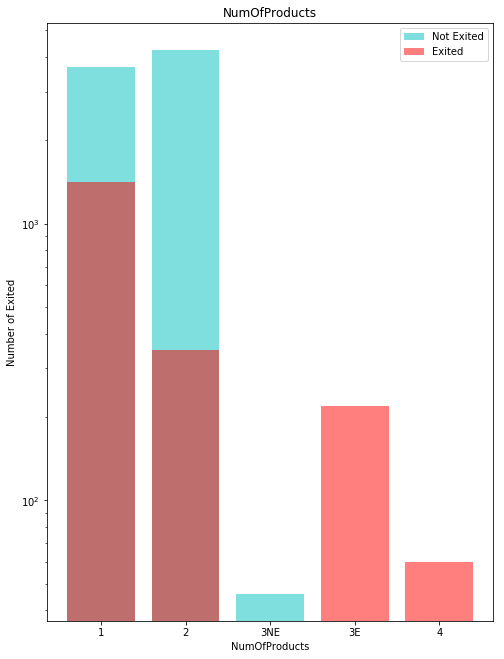

In [68]:
plt.subplots(figsize=(8,11))
plt.bar(['1','2','3NE','3E','4'],[p1_0,p2_0,p3_0,0,p4_0], alpha=0.5, label ='Not Exited', color = 'c')
plt.bar(['1','2','3NE','3E','4'],[p1_1,p2_1,0,p3_1,p4_1], alpha=0.5, label ='Exited', color = 'red')
plt.yscale('log')
plt.title('NumOfProducts')
plt.xlabel('NumOfProducts')
plt.ylabel('Number of Exited')
plt.legend()
plt.show()

`From the above figure we can see that as the number of products increase the possibility of exiting is less but when the number of products increase more than 2 the percentage of exiting increases there it reaches to 100% when number of products reaches 4`

In [22]:
print(df['Age'].unique())
print(df['Age'].min(),"=================================================================>",df['Age'].max())

[42 41 39 43 44 50 29 27 31 24 34 25 35 45 58 32 38 46 36 33 40 51 61 49
 37 19 66 56 26 21 55 75 22 30 28 65 48 52 57 73 47 54 72 20 67 79 62 53
 80 59 68 23 60 70 63 64 18 82 69 74 71 76 77 88 85 84 78 81 92 83]
18 =================================================================> 92


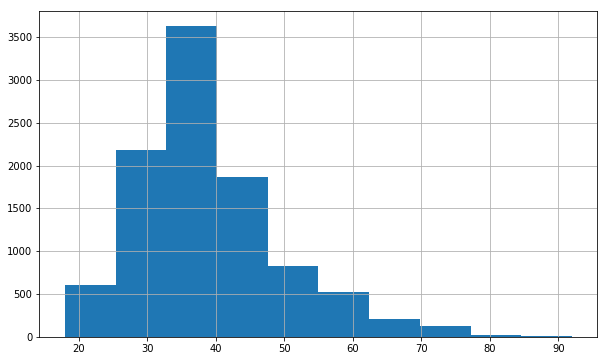

In [23]:
df['Age'].hist(figsize=(10,6));

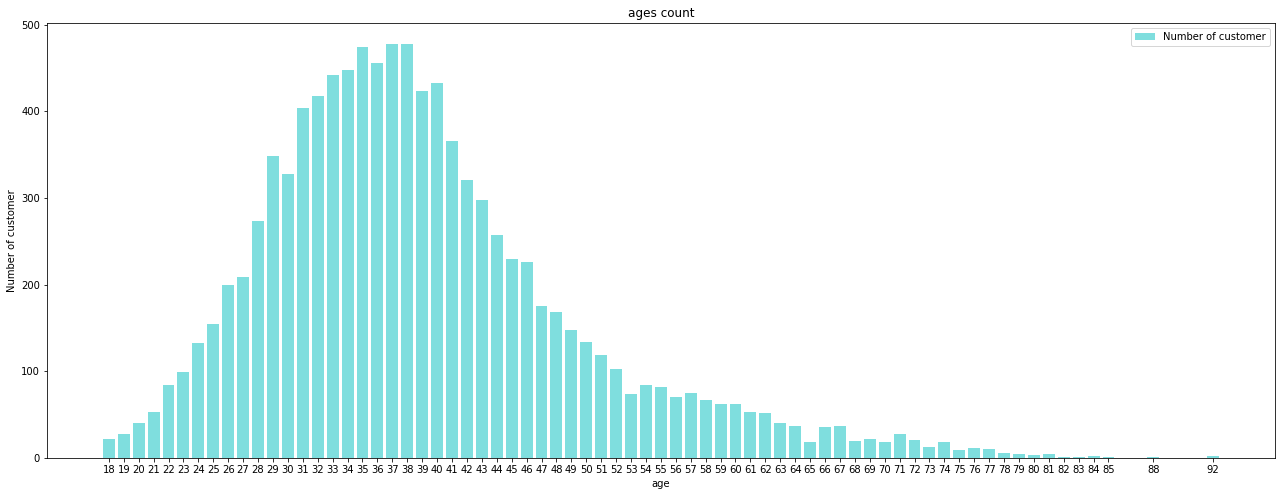

In [69]:
plt.subplots(figsize=(22,8))
x1 =  [ k for k in df['Age'].value_counts().index ]
y1 = [v for v in df['Age'].value_counts()]
plt.bar(x1,y1,  alpha=0.5, label ='Number of customer', color = 'c')
plt.xticks(df['Age'].value_counts().index) 
plt.title('ages count')
plt.xlabel('age')
plt.ylabel('Number of customer')
plt.legend()
plt.show()

`The figure show that the age range from 20- 60 has majority of customers and the age of 37 has the largest number of customers`

In [107]:
v=df.groupby(['Age','Exited']).count()
v

RowNumber  CustomerId  Surname  CreditScore  Geography  Gender  \
Age Exited                                                                   
18  0              20          20       20           20         20      20   
    1               2           2        2            2          2       2   
19  0              26          26       26           26         26      26   
    1               1           1        1            1          1       1   
20  0              38          38       38           38         38      38   
    1               2           2        2            2          2       2   
21  0              50          50       50           50         50      50   
    1               3           3        3            3          3       3   
22  0              72          72       72           72         72      72   
    1              12          12       12           12         12      12   
23  0              93          93       93           93         93      93   
    1               6           6        6            6          6       6   
24  0             118         118      118          118        118     118   
    1              14          14       14           14         14      14   
25  0             148         148      148          148        148     148   
    1               6           6        6            6          6       6   
26  0             186         186      186          186        186     186   
    1              14          14       14           14         14      14   
27  0             196         196      196          196        196     196   
    1              13          13       13           13         13      13   
28  0             250         250      250          250        250     250   
    1              23          23       23           23         23      23   
29  0             320         320      320          320        320     320   
    1              28          28       28           28         28      28   
30  0             303         303      303          303        303     303   
    1              24          24       24           24         24      24   
31  0             371         371      371          371        371     371   
    1              33          33       33           33         33      33   
32  0             386         386      386          386        386     386   
    1              32          32       32           32         32      32   
...               ...         ...      ...          ...        ...     ...   
67  0              32          32       32           32         32      32   
    1               5           5        5            5          5       5   
68  0              13          13       13           13         13      13   
    1               6           6        6            6          6       6   
69  0              20          20       20           20         20      20   
    1               2           2        2            2          2       2   
70  0              14          14       14           14         14      14   
    1               4           4        4            4          4       4   
71  0              20          20       20           20         20      20   
    1               7           7        7            7          7       7   
72  0              20          20       20           20         20      20   
    1               1           1        1            1          1       1   
73  0              12          12       12           12         12      12   
    1               1           1        1            1          1       1   
74  0              17          17       17           17         17      17   
    1               1           1        1            1          1       1   
75  0               9           9        9            9          9       9   
76  0              11          11       11           11         11      11   
77  0              10          10 

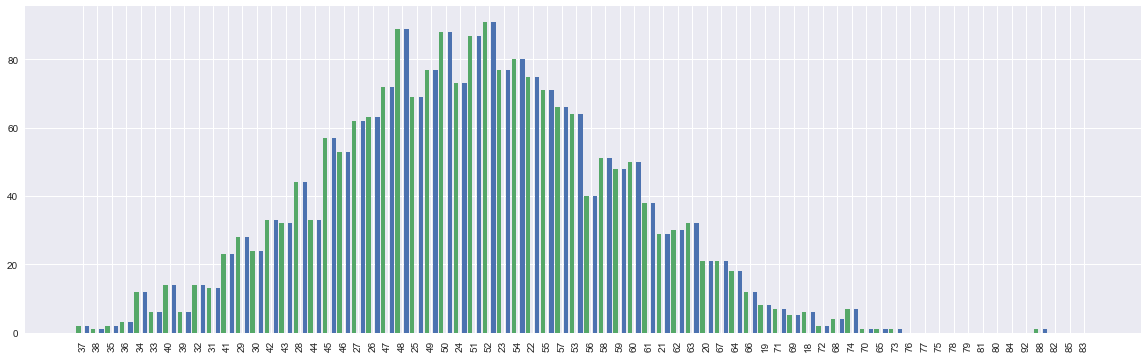

In [35]:
df.rename(columns=lambda x:x.lower(),inplace = True)

x = df.groupby('age').exited.sum()

nx = df.groupby('age').exited.count() - x
plt.figure(figsize=(20,6))
pins = np.array(range(len(x)))
w = 0.3
plt.bar(pins+w,x,width=w)
plt.bar(pins-w,x,width=w)

plt.xticks(pins,df['age'].value_counts().index,rotation='vertical');
